In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("https://raw.githubusercontent.com/itsnivas-k/OIBSIP/main/Car%20Price%20Prediction/CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.isnull().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [9]:
print(data.describe())

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

<ipython-input-14-304581fcc834>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


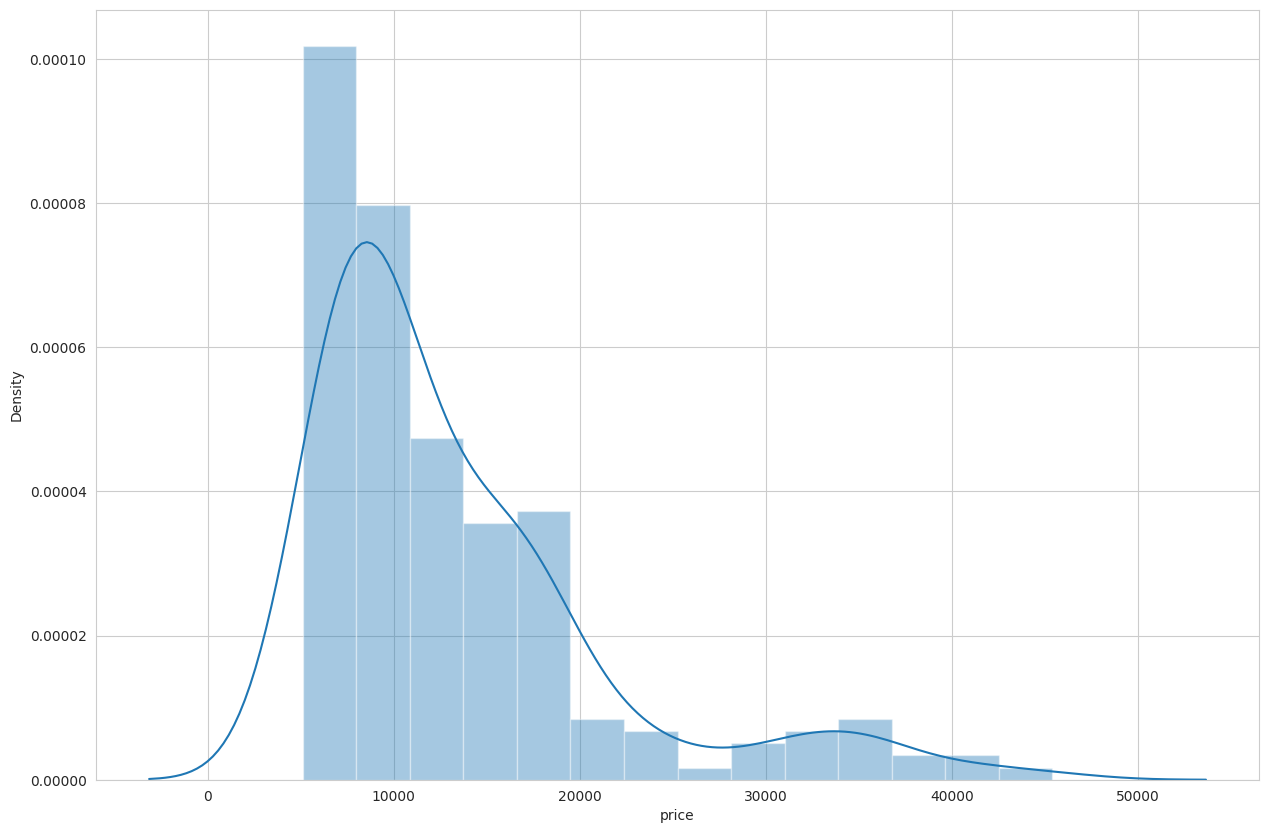

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

In [15]:
print(data.corr())

                  symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414

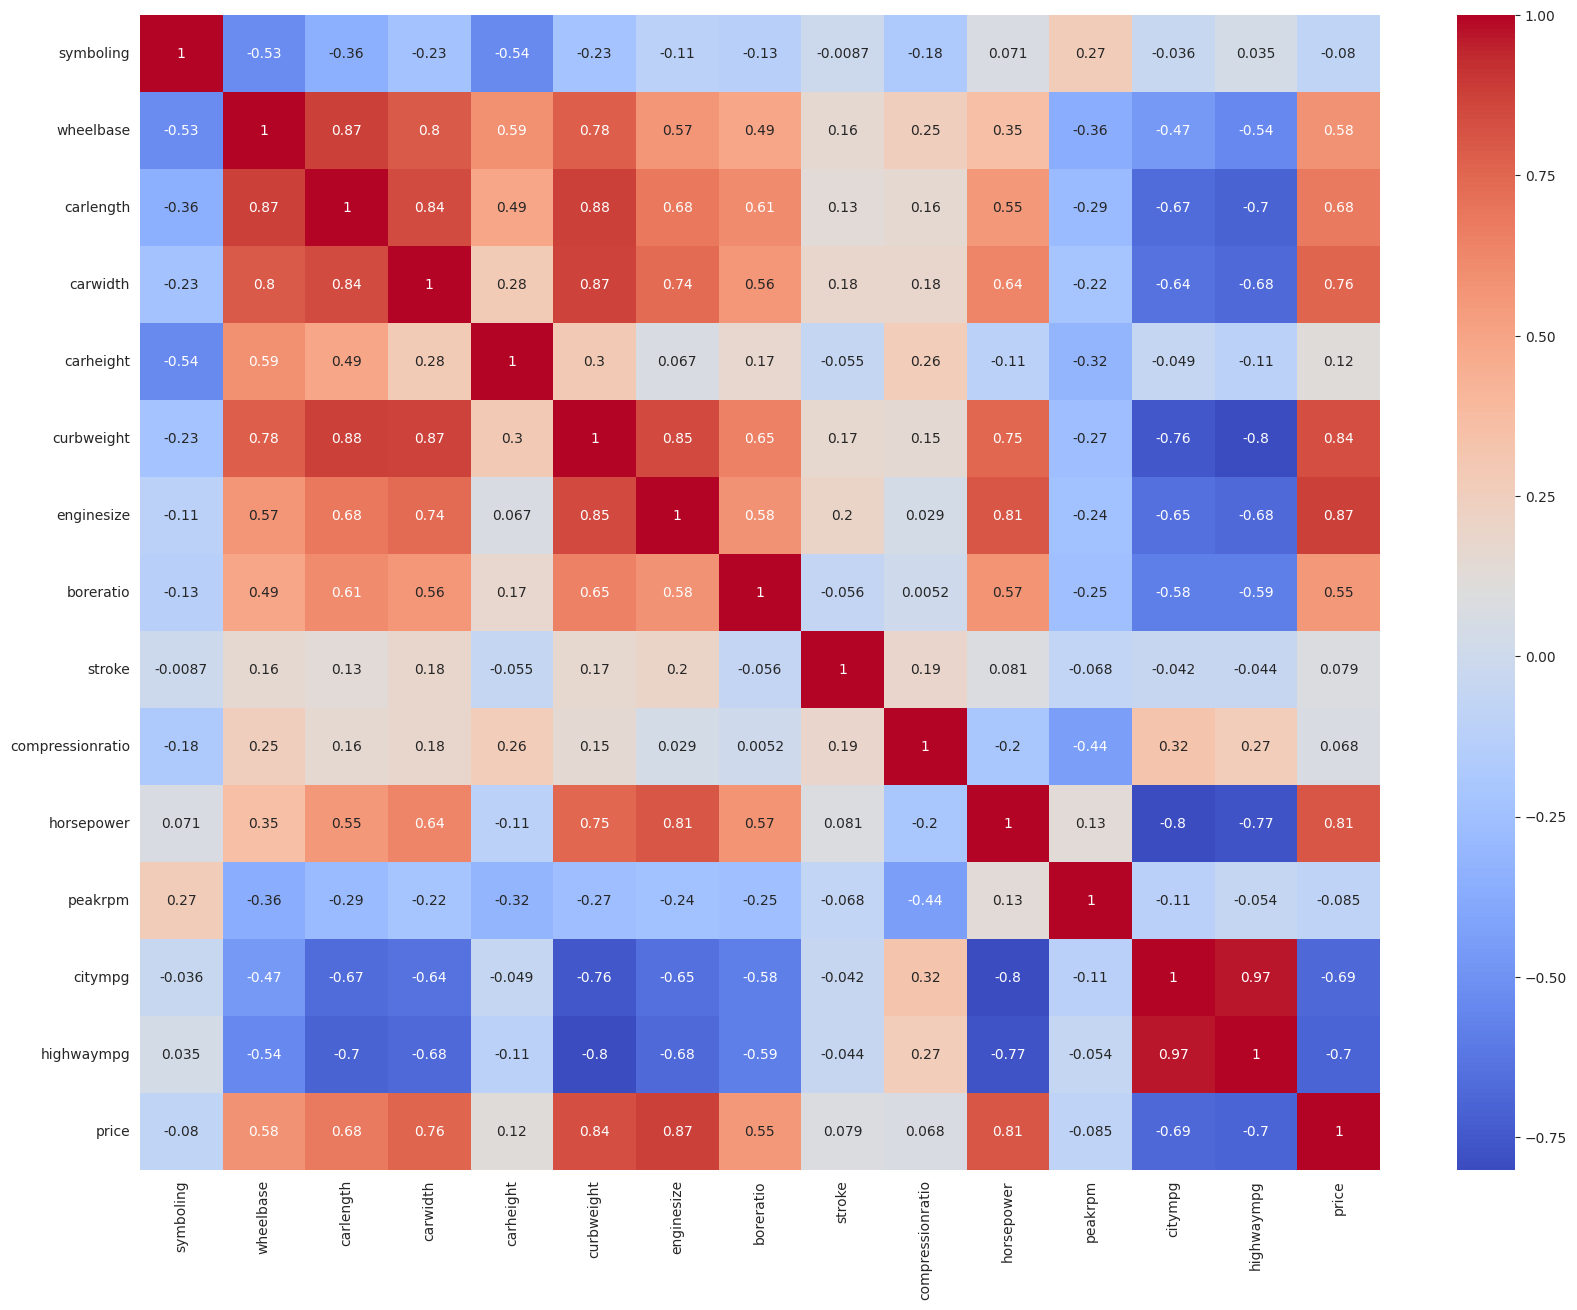

In [16]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [17]:
predict = "price"
data = data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

<ipython-input-17-56df943d8afb>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


1.0